
## Attribute Information
##### 1. Activity: atividade realizada
##### 2. HRmean: média da fraquência cardíaca durante a atividade
##### 3. HRmax: máximo da fraquência cardíaca durante a atividade
##### 4. HRmin: mínimo da fraquência cardíaca durante a atividade
##### 5. Duration: duração da atividade realizada

## Criação do Dataset

In [1]:
import sklearn as skl
import pandas as pd
import numpy as np    
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_csv("Datasets/sleep.csv")

## Exploração de Dados

In [3]:
df.columns

Index(['HRmean', 'HRmax', 'HRmin', 'HalfHourBeforeSleep', 'DeepSleepBegin',
       'LightSleep', 'DeepSleep'],
      dtype='object')

In [4]:
df.head()


,HRmean,HRmax,HRmin,HalfHourBeforeSleep,DeepSleepBegin,LightSleep,DeepSleep
0,74,94,56,2020-01-12T22:49:00.000Z,NaN,24,0
1,60,81,48,2020-02-16T23:56:00.000Z,2020-02-17T00:26:00.000Z,234,113
2,78,109,61,2020-05-05T00:03:00.000+01:00,NaN,85,0
3,82,102,71,2020-05-10T23:57:00.000+01:00,2020-05-11T04:04:00.000+01:00,434,35
4,77,101,70,2020-05-12T23:33:00.000+01:00,NaN,24,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   HRmean               323 non-null    int64 
 1   HRmax                323 non-null    int64 
 2   HRmin                323 non-null    int64 
 3   HalfHourBeforeSleep  323 non-null    object
 4   DeepSleepBegin       303 non-null    object
 5   LightSleep           323 non-null    int64 
 6   DeepSleep            323 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 17.8+ KB


In [6]:
df['HalfHourBeforeSleep'] = pd.to_datetime(df['HalfHourBeforeSleep'])
df['DeepSleepBegin'] = pd.to_datetime(df['DeepSleepBegin'])


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   HRmean               323 non-null    int64 
 1   HRmax                323 non-null    int64 
 2   HRmin                323 non-null    int64 
 3   HalfHourBeforeSleep  323 non-null    object
 4   DeepSleepBegin       303 non-null    object
 5   LightSleep           323 non-null    int64 
 6   DeepSleep            323 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 17.8+ KB


In [8]:
df['DurationUntilDeepSleep'] = df['DeepSleepBegin'] - df['HalfHourBeforeSleep']
df['DurationUntilDeepSleep']=df['DurationUntilDeepSleep']/np.timedelta64(1,'m')

In [9]:
df['TotalSleep'] = (df['LightSleep'] + df['DeepSleep'])

In [10]:
df.head()

,HRmean,HRmax,HRmin,HalfHourBeforeSleep,DeepSleepBegin,LightSleep,DeepSleep,DurationUntilDeepSleep,TotalSleep
0,74,94,56,2020-01-12 22:49:00+00:00,NaN,24,0,NaN,24
1,60,81,48,2020-02-16 23:56:00+00:00,2020-02-17 00:26:00+00:00,234,113,30.0,347
2,78,109,61,2020-05-05 00:03:00+01:00,NaN,85,0,NaN,85
3,82,102,71,2020-05-10 23:57:00+01:00,2020-05-11 04:04:00+01:00,434,35,247.0,469
4,77,101,70,2020-05-12 23:33:00+01:00,NaN,24,0,NaN,24


In [11]:
df.head()

,HRmean,HRmax,HRmin,HalfHourBeforeSleep,DeepSleepBegin,LightSleep,DeepSleep,DurationUntilDeepSleep,TotalSleep
0,74,94,56,2020-01-12 22:49:00+00:00,NaN,24,0,NaN,24
1,60,81,48,2020-02-16 23:56:00+00:00,2020-02-17 00:26:00+00:00,234,113,30.0,347
2,78,109,61,2020-05-05 00:03:00+01:00,NaN,85,0,NaN,85
3,82,102,71,2020-05-10 23:57:00+01:00,2020-05-11 04:04:00+01:00,434,35,247.0,469
4,77,101,70,2020-05-12 23:33:00+01:00,NaN,24,0,NaN,24


In [12]:
df.describe()

,HRmean,HRmax,HRmin,LightSleep,DeepSleep,DurationUntilDeepSleep,TotalSleep
count,323.000000,323.000000,323.000000,323.000000,323.000000,303.000000,323.000000
mean,71.495356,91.476780,58.795666,292.690402,141.572755,77.663366,434.263158
std,10.482275,18.933897,9.256274,110.592125,69.290034,81.863108,159.639040
min,47.000000,48.000000,41.000000,0.000000,0.000000,30.000000,3.000000
25%,65.000000,78.000000,52.000000,257.000000,101.500000,40.000000,403.000000
50%,72.000000,94.000000,55.000000,316.000000,153.000000,58.000000,486.000000
75%,78.000000,105.000000,67.000000,366.000000,191.000000,83.000000,534.000000
max,109.000000,192.000000,86.000000,526.000000,315.000000,1207.000000,662.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   HRmean                  323 non-null    int64  
 1   HRmax                   323 non-null    int64  
 2   HRmin                   323 non-null    int64  
 3   HalfHourBeforeSleep     323 non-null    object 
 4   DeepSleepBegin          303 non-null    object 
 5   LightSleep              323 non-null    int64  
 6   DeepSleep               323 non-null    int64  
 7   DurationUntilDeepSleep  303 non-null    float64
 8   TotalSleep              323 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 22.8+ KB


In [14]:
df.isna().any()

HRmean                    False
HRmax                     False
HRmin                     False
HalfHourBeforeSleep       False
DeepSleepBegin             True
LightSleep                False
DeepSleep                 False
DurationUntilDeepSleep     True
TotalSleep                False
dtype: bool

In [15]:
df = df.dropna()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 322
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   HRmean                  303 non-null    int64  
 1   HRmax                   303 non-null    int64  
 2   HRmin                   303 non-null    int64  
 3   HalfHourBeforeSleep     303 non-null    object 
 4   DeepSleepBegin          303 non-null    object 
 5   LightSleep              303 non-null    int64  
 6   DeepSleep               303 non-null    int64  
 7   DurationUntilDeepSleep  303 non-null    float64
 8   TotalSleep              303 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 23.7+ KB


In [17]:
df.isna().any()


HRmean                    False
HRmax                     False
HRmin                     False
HalfHourBeforeSleep       False
DeepSleepBegin            False
LightSleep                False
DeepSleep                 False
DurationUntilDeepSleep    False
TotalSleep                False
dtype: bool

In [18]:
df = df.drop(['HalfHourBeforeSleep', 'DeepSleepBegin', 'LightSleep'], axis=1)


In [19]:
obj_cols = []
num_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        obj_cols.append(col)
    else:
        num_cols.append(col)


In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 322
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   HRmean                  303 non-null    int64  
 1   HRmax                   303 non-null    int64  
 2   HRmin                   303 non-null    int64  
 3   DeepSleep               303 non-null    int64  
 4   DurationUntilDeepSleep  303 non-null    float64
 5   TotalSleep              303 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 16.6 KB


#### Análise HRmax

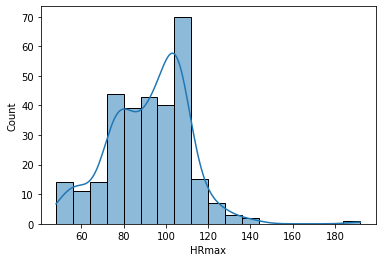

In [21]:
sns.histplot(df['HRmax'], kde=True);

In [22]:
print("Skewness: %f" % df['HRmax'].skew())
print("Kurtosis: %f" %df['HRmax'].kurt())

Skewness: 0.178531
Kurtosis: 1.991187


#### Análise HRmean 

<AxesSubplot:xlabel='HRmean', ylabel='Count'>

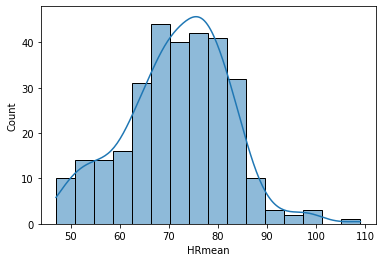

In [23]:
sns.histplot(df['HRmean'], kde=True)


In [24]:
print("Skewness: %f" % df['HRmean'].skew())
print("Kurtosis: %f" %df['HRmean'].kurt())

Skewness: -0.108417
Kurtosis: 0.238508


#### Análise HRmin

<AxesSubplot:xlabel='HRmin', ylabel='Count'>

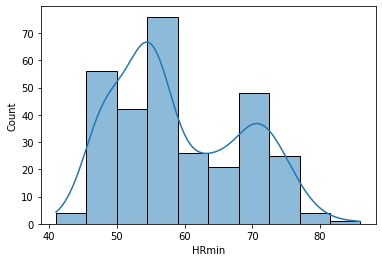

In [25]:
sns.histplot(df['HRmin'], kde=True)


In [26]:
print("Skewness: %f" % df['HRmin'].skew())
print("Kurtosis: %f" %df['HRmin'].kurt())

Skewness: 0.457728
Kurtosis: -0.903098


#### Remoção de dados não apropriados

<AxesSubplot:xlabel='TotalSleep', ylabel='Count'>

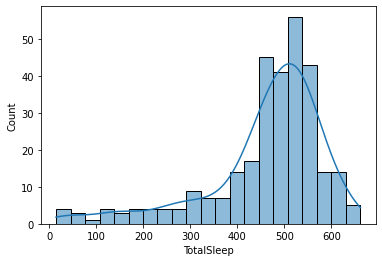

In [27]:
sns.histplot(df['TotalSleep'], kde=True)

In [28]:
df = df[df['TotalSleep'] > 299]


<AxesSubplot:xlabel='TotalSleep', ylabel='Count'>

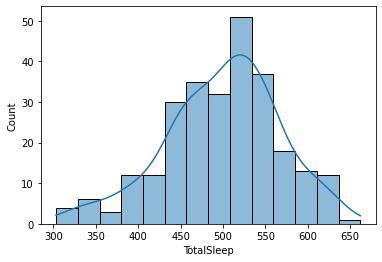

In [29]:
sns.histplot(df['TotalSleep'], kde=True)

In [30]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 1 to 322
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   HRmean                  266 non-null    int64  
 1   HRmax                   266 non-null    int64  
 2   HRmin                   266 non-null    int64  
 3   DeepSleep               266 non-null    int64  
 4   DurationUntilDeepSleep  266 non-null    float64
 5   TotalSleep              266 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 14.5 KB
None


In [31]:
df['DeepSleepPercentage'] = ( df['DeepSleep'] / df['TotalSleep'] ) * 100


In [32]:
df = df.drop(['DeepSleep', 'TotalSleep'], axis=1)

In [33]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 1 to 322
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   HRmean                  266 non-null    int64  
 1   HRmax                   266 non-null    int64  
 2   HRmin                   266 non-null    int64  
 3   DurationUntilDeepSleep  266 non-null    float64
 4   DeepSleepPercentage     266 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 12.5 KB


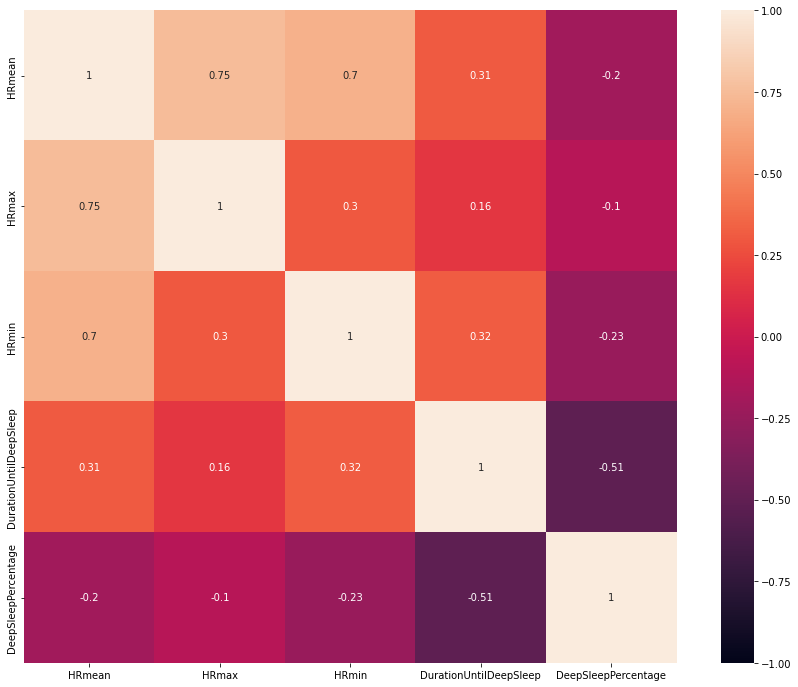

In [34]:
corr_matrix = df.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corr_matrix, vmin= -1, vmax = 1, square=True, annot =True);

## Preparação de Dados

### Verificar Balanceamento do Dataset   

<AxesSubplot:xlabel='DeepSleepPercentage', ylabel='Count'>

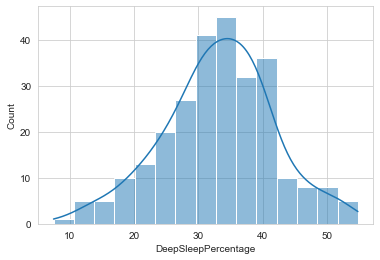

In [35]:
sns.set_style('whitegrid')
sns.histplot(df['DeepSleepPercentage'], kde=True)


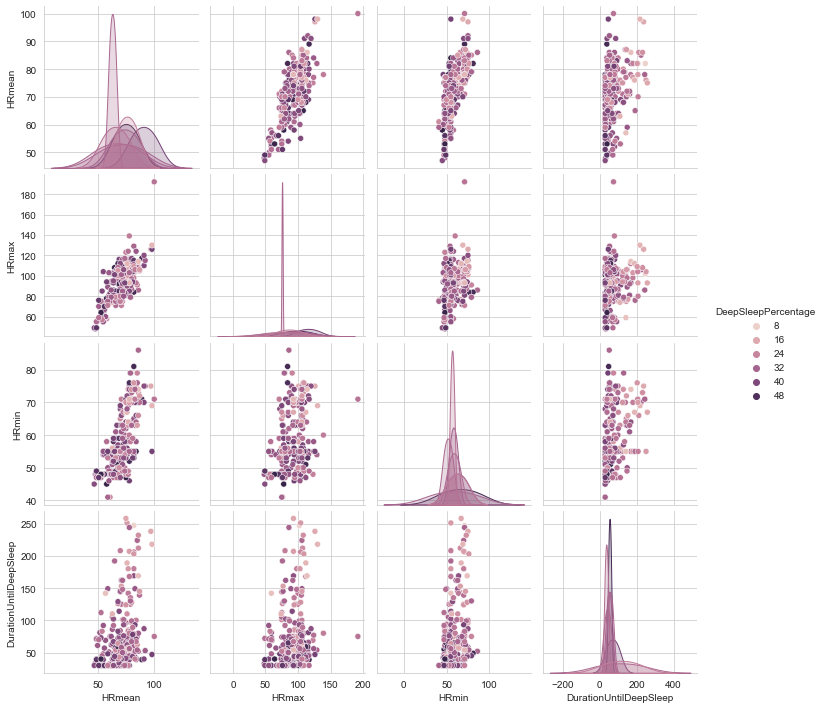

In [36]:
sns.pairplot(df,hue="DeepSleepPercentage");

### Dados Numéricos

#### HRmean

In [37]:
''' Detection '''
# IQR
Q1 = np.percentile(df['HRmean'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['HRmean'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)

''' Removing the Outliers '''
df = df[(df['HRmean'] <= (Q3+1.5*IQR)) & (df['HRmean'] >= (Q1-1.5*IQR))]
 
print("New Shape: ", df.shape)

Old Shape:  (266, 5)
New Shape:  (261, 5)


C:\Users\Leonardo\AppData\Local\Temp\ipykernel_26104\1620905041.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['HRmean'], 25,
C:\Users\Leonardo\AppData\Local\Temp\ipykernel_26104\1620905041.py:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['HRmean'], 75,


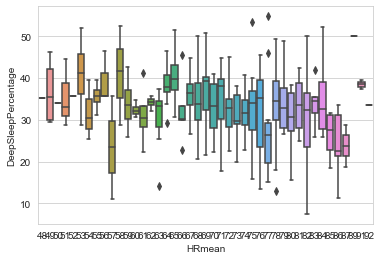

In [38]:
ax = sns.boxplot(x=df["HRmean"], y=df["DeepSleepPercentage"])


#### HRmax

In [39]:
''' Detection '''
# IQR
Q1 = np.percentile(df['HRmax'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['HRmax'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)

 
''' Removing the Outliers '''
df = df[(df['HRmax'] <= (Q3+1.5*IQR)) & (df['HRmax'] >= (Q1-1.5*IQR))]


print("New Shape: ", df.shape)

Old Shape:  (261, 5)
New Shape:  (261, 5)


C:\Users\Leonardo\AppData\Local\Temp\ipykernel_26104\745463450.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['HRmax'], 25,
C:\Users\Leonardo\AppData\Local\Temp\ipykernel_26104\745463450.py:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['HRmax'], 75,


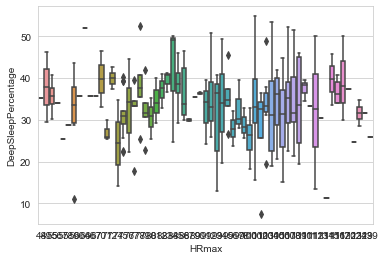

In [40]:
ax = sns.boxplot(x=df["HRmax"], y=df["DeepSleepPercentage"])


#### HRmin

In [41]:
''' Detection '''
# IQR
Q1 = np.percentile(df['HRmin'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['HRmin'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
''' Removing the Outliers '''
df = df[(df['HRmin'] <= (Q3+1.5*IQR)) & (df['HRmin'] >= (Q1-1.5*IQR))]


print("New Shape: ", df.shape)

Old Shape:  (261, 5)
New Shape:  (261, 5)


C:\Users\Leonardo\AppData\Local\Temp\ipykernel_26104\686709792.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['HRmin'], 25,
C:\Users\Leonardo\AppData\Local\Temp\ipykernel_26104\686709792.py:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['HRmin'], 75,


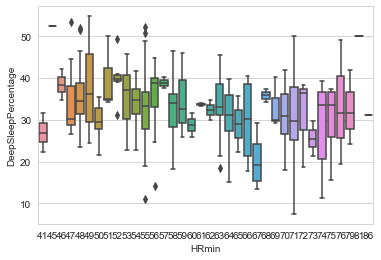

In [42]:
ax = sns.boxplot(x=df["HRmin"], y=df["DeepSleepPercentage"])


## Modelos

#### Separação Treino Teste

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 1 to 322
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   HRmean                  261 non-null    int64  
 1   HRmax                   261 non-null    int64  
 2   HRmin                   261 non-null    int64  
 3   DurationUntilDeepSleep  261 non-null    float64
 4   DeepSleepPercentage     261 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 20.3 KB


In [44]:

X = df.drop(['DeepSleepPercentage'], axis=1)
y = df['DeepSleepPercentage'].to_frame()


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=2022)

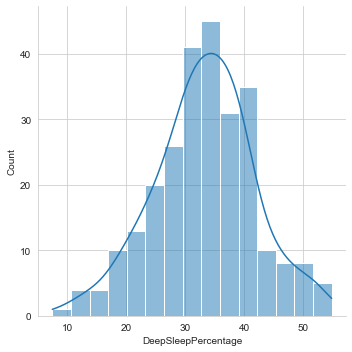

In [46]:
sns.displot(df["DeepSleepPercentage"], kde=True)

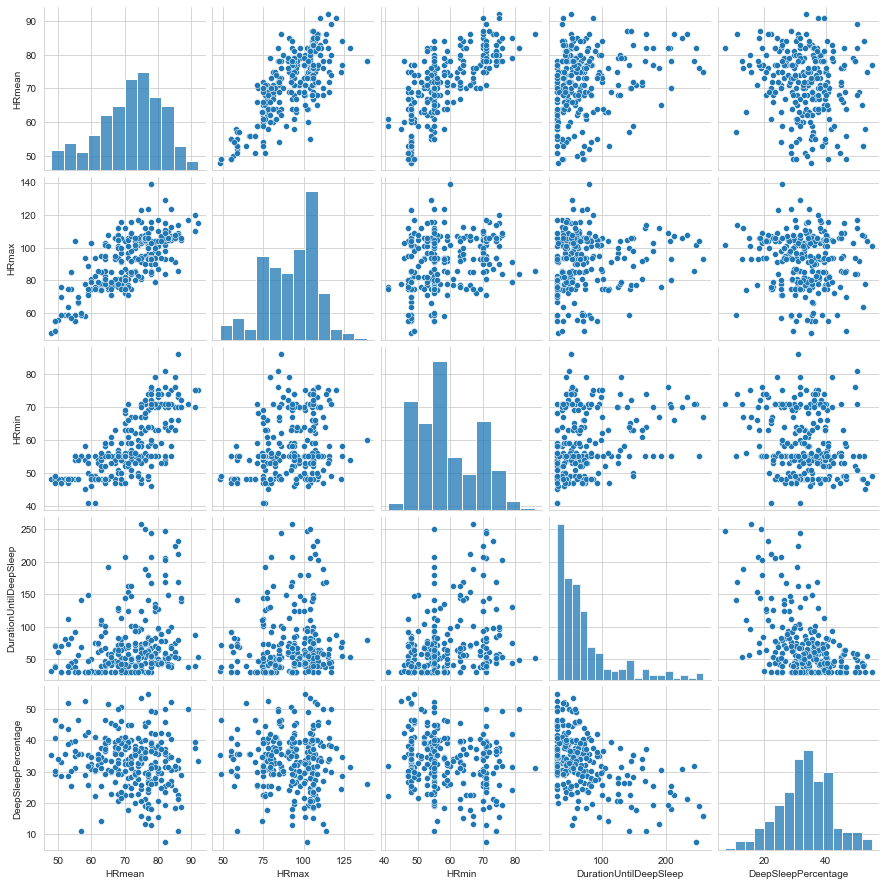

In [47]:
sns.pairplot(df)

### Regressão Linear

#### Treino e Previsão

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


In [49]:
model = make_pipeline(StandardScaler(), LinearRegression())
params= {}

In [50]:
grid = GridSearchCV(model,params, cv=KFold(n_splits=10), n_jobs=1, verbose=2,
                    return_train_score=True, scoring='neg_mean_absolute_error', refit=True)


In [51]:
grid.fit(X_train,y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=1, param_grid={}, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=2)

In [52]:
predictions = grid.predict(X_test)
predictions

array([[37.26083283],
       [26.41378308],
       [36.43312997],
       [26.90688582],
       [34.09449815],
       [31.7577578 ],
       [26.60514602],
       [35.12656999],
       [34.47390687],
       [33.6131678 ],
       [34.15013269],
       [37.38811609],
       [34.88295107],
       [32.59443622],
       [33.23157605],
       [34.29364683],
       [33.56807211],
       [32.24358317],
       [34.38873345],
       [30.74138339],
       [34.61983845],
       [32.66887157],
       [32.57601482],
       [37.44853877],
       [33.73281613],
       [35.13250527],
       [34.96854803],
       [34.91484743],
       [36.58816597],
       [35.61982075],
       [35.39476677],
       [36.66776458],
       [36.82454997],
       [37.57787172],
       [34.90731649],
       [35.00512104],
       [34.62023554],
       [33.85415236],
       [33.54026066],
       [35.41351927],
       [36.49050965],
       [37.5314792 ],
       [34.22160997],
       [34.55275959],
       [37.64224597],
       [33

#### Avaliação

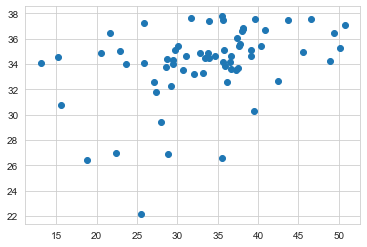

In [53]:
plt.scatter(y_test, predictions)

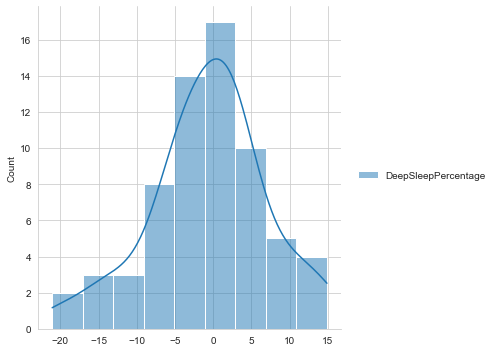

In [54]:
sns.displot((y_test-predictions), kde=True)

In [55]:
from sklearn import metrics

In [56]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5.720641121772741
MSE: 57.19522678146815
RMSE: 7.562752592903469


### Árvore de Decisão

#### Treino e Previsão

In [66]:
from sklearn.tree import DecisionTreeRegressor

In [67]:
clf = DecisionTreeRegressor(random_state=2022)
params = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],
             'min_samples_leaf': range(1,5)}

In [68]:
grid = GridSearchCV(clf, params, cv=KFold(n_splits=10), n_jobs=1, verbose=2, return_train_score=True, scoring='neg_mean_absolute_error', refit=True)

In [69]:
grid.fit(X_train,y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] END ........criterion=squared_error, min_samples_leaf=1; total time=   0.0s
[CV] END ........criterion=squared_error, min_samples_leaf=1; total time=   0.0s
[CV] END ........criterion=squared_error, min_samples_leaf=1; total time=   0.0s
[CV] END ........criterion=squared_error, min_samples_leaf=1; total time=   0.0s
[CV] END ........criterion=squared_error, min_samples_leaf=1; total time=   0.0s
[CV] END ........criterion=squared_error, min_samples_leaf=1; total time=   0.0s
[CV] END ........criterion=squared_error, min_samples_leaf=1; total time=   0.0s
[CV] END ........criterion=squared_error, min_samples_leaf=1; total time=   0.0s
[CV] END ........criterion=squared_error, min_samples_leaf=1; total time=   0.0s
[CV] END ........criterion=squared_error, min_samples_leaf=1; total time=   0.0s
[CV] END ........criterion=squared_error, min_samples_leaf=2; total time=   0.0s
[CV] END ........criterion=squared_error, min_

[CV] END .......criterion=absolute_error, min_samples_leaf=4; total time=   0.0s
[CV] END .......criterion=absolute_error, min_samples_leaf=4; total time=   0.0s
[CV] END .......criterion=absolute_error, min_samples_leaf=4; total time=   0.0s
[CV] END .......criterion=absolute_error, min_samples_leaf=4; total time=   0.0s
[CV] END .......criterion=absolute_error, min_samples_leaf=4; total time=   0.0s
[CV] END .......criterion=absolute_error, min_samples_leaf=4; total time=   0.0s
[CV] END .......criterion=absolute_error, min_samples_leaf=4; total time=   0.0s
[CV] END .......criterion=absolute_error, min_samples_leaf=4; total time=   0.0s
[CV] END .......criterion=absolute_error, min_samples_leaf=4; total time=   0.0s
[CV] END .......criterion=absolute_error, min_samples_leaf=4; total time=   0.0s


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeRegressor(random_state=2022), n_jobs=1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'min_samples_leaf': range(1, 5)},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=2)

In [70]:
print(f'The best parameters are: {grid.best_params_}')
print(f'The best score that we got is: {grid.best_score_}')

The best parameters are: {'criterion': 'squared_error', 'min_samples_leaf': 4}
The best score that we got is: -6.526250242091324


In [71]:
predictions = grid.predict(X_test)
predictions

array([34.22330013, 23.77794802, 41.22238059, 23.77794802, 38.03692582,
       24.1978078 , 23.77794802, 34.22330013, 38.03692582, 40.72126121,
       37.98336043, 31.37492557, 36.85261503, 24.1978078 , 34.23003043,
       24.52195552, 32.74852597, 33.42014118, 39.4255855 , 24.1978078 ,
       36.85261503, 24.1978078 , 30.65515352, 39.4255855 , 24.1978078 ,
       29.94978849, 36.85261503, 31.97221818, 28.88623156, 32.74852597,
       32.74852597, 31.97221818, 34.12569885, 34.22330013, 36.85261503,
       32.74852597, 32.74852597, 36.85261503, 45.0255942 , 45.0255942 ,
       45.0255942 , 44.61370912, 34.23003043, 38.03692582, 34.22330013,
       38.03692582, 35.38857525, 35.38857525, 39.48318279, 38.16889955,
       41.22238059, 29.94978849, 35.38857525, 40.72126121, 23.15312708,
       31.97221818, 34.23003043, 37.98336043, 29.94978849, 30.65515352,
       29.94978849, 30.88764784, 34.22330013, 31.97221818, 38.54499446,
       41.22238059])

#### Avaliação

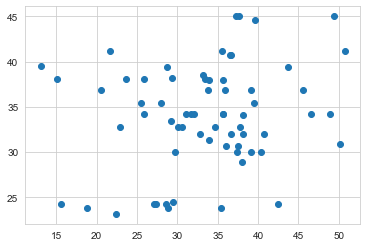

In [72]:
plt.scatter(y_test, predictions)


(array([ 2.,  1.,  2.,  7., 12., 11., 17.,  8.,  4.,  2.]),
 array([-26.4234813 , -21.85779141, -17.29210153, -12.72641165,
         -8.16072176,  -3.59503188,   0.970658  ,   5.53634788,
         10.10203777,  14.66772765,  19.23341753]),
 <BarContainer object of 10 artists>)

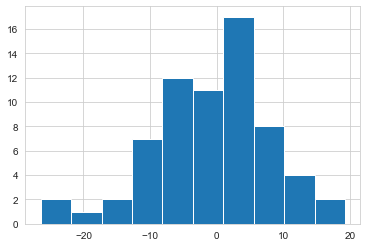

In [73]:
plt.hist(y_test - predictions.reshape(66,1))

In [74]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 7.0889694031845405
MSE: 80.29533909033375
RMSE: 8.960766657509488


### SVM - Support Vector Machine

#### Treino e Previsão

In [75]:
from sklearn.svm import SVR


In [76]:
params = {'C':[1,10,100,1000], 'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
clf = SVR()

In [77]:
grid = GridSearchCV(clf, params, cv=KFold(n_splits=3), n_jobs=1, verbose=2, return_train_score=True, scoring='neg_mean_absolute_error', refit=True)

In [78]:
grid.fit(X_train,y_train.values.ravel())

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=SVR(), n_jobs=1,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=2)

In [83]:
print(f'The best parameters are: {grid.best_params_}')
print(f'The best score that we got is: {grid.best_score_}')

The best parameters are: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
The best score that we got is: -6.236242755279224


In [84]:
predictions = grid.predict(X_test)
predictions

array([34.83699518, 27.09494778, 34.82433071, 27.60305232, 34.34153418,
       32.24602372, 26.96068153, 34.43932846, 34.22238238, 34.17135831,
       34.10863164, 34.88294683, 34.18657503, 32.91012283, 33.82598938,
       34.1615133 , 33.95914091, 32.4979962 , 33.71253035, 31.51334576,
       34.19642345, 33.12729447, 33.56913123, 34.51350969, 32.91538632,
       34.43137112, 34.55354553, 34.73425297, 34.75085734, 34.86603702,
       34.79665701, 34.848567  , 34.57108555, 34.77210957, 34.32934188,
       34.66764049, 34.39488565, 33.85898732, 33.53900146, 34.79605281,
       34.7291346 , 34.97226612, 34.17117433, 34.25940596, 34.73217836,
       34.19895964, 29.39571855, 24.96598379, 34.38398971, 33.35772219,
       34.92185885, 34.70468898, 30.44484622, 34.13295612, 27.85836088,
       34.8607036 , 34.34670561, 33.75290802, 34.74101229, 34.16520667,
       34.78183252, 34.03453954, 34.71360886, 34.6583447 , 32.97305174,
       34.78929642])

#### Avaliação

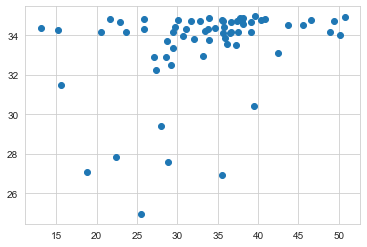

In [85]:
plt.scatter(y_test, predictions)

(array([ 2.,  1.,  4.,  3., 13., 12., 18.,  4.,  5.,  4.]),
 array([-21.32428821, -17.58320681, -13.84212541, -10.101044  ,
         -6.3599626 ,  -2.61888119,   1.12220021,   4.86328162,
          8.60436302,  12.34544443,  16.08652583]),
 <BarContainer object of 10 artists>)

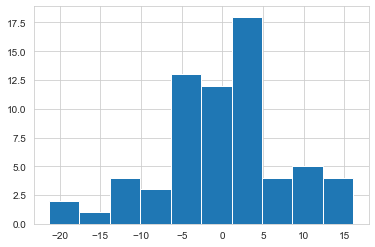

In [86]:
plt.hist(y_test - predictions.reshape(66,1))


In [87]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 5.831581420481576
MSE: 59.8176255739718
RMSE: 7.734185514582114


### Florestas Aleatórias (Random Forests)

#### Treino e Previsão

In [88]:
from sklearn.ensemble import RandomForestRegressor


In [89]:
params = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
clf = RandomForestRegressor(random_state=2022)

In [90]:
grid = GridSearchCV(clf, params, cv=KFold(n_splits=10), n_jobs=1, verbose=2, return_train_score=True, scoring='neg_mean_absolute_error', refit=True)

In [91]:
grid.fit(X_train,y_train.values.ravel())

Fitting 10 folds for each of 288 candidates, totalling 2880 fits
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV]

[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_sam

[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_le

[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_s

[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_le

[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   0.7s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   0.7s
[CV] END bootstrap=True, max_depth=80, max_features=2, 

[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_le

[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=3, m

[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_le

[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_s

[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_le

[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=80, max_features=3, min_sam

[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_l

[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_sam

[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   1.4s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samp

[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_sam

[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_sam

[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=2, min_sam

[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   1.2s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_sam

[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_sam

[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_sam

[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_s

[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_sam

[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=90, max_features=3, 

[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=2,

[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, max_depth=100, max_feat

[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=2,

[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=4, min_samples_split=12, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features

[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=2,

[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=12, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, 

[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=100, max_features=3,

[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_

[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=3,

[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_sa

[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=100, max_features=3,

[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_sa

[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=110, max_features

[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_sa

[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, max_depth=110, max_featu

[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_sa

[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=110, max_feat

[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_sa

[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, max_depth=110, max_feat

[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_sa

[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_feature

[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_sa

[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   0.9s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=1000; total time=   0.8s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=12, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=110, max_features=

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(random_state=2022), n_jobs=1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=2)

In [92]:
print(f'The best parameters are: {grid.best_params_}')
print(f'The best score that we got is: {grid.best_score_}')

The best parameters are: {'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 200}
The best score that we got is: -5.977789202167445


In [93]:
predictions = grid.predict(X_test)
predictions

array([35.95675837, 24.38500375, 36.42284466, 24.85728434, 35.52663648,
       31.64457875, 26.62599391, 35.2791796 , 34.62800512, 37.01848852,
       34.93176563, 34.02096272, 38.14252424, 32.47489585, 33.25813569,
       33.62887802, 35.80348458, 33.38843983, 36.01354045, 29.6514924 ,
       37.47328018, 32.95636139, 33.16642808, 37.32999574, 32.38487216,
       33.14184385, 36.90407528, 36.19050568, 35.7946405 , 35.59115835,
       35.06902486, 33.90594184, 36.61990108, 35.89416736, 37.35443155,
       36.45796141, 35.66708865, 36.41111933, 33.44741574, 36.97658277,
       37.39250796, 38.87003351, 34.6431036 , 34.15827593, 36.10866702,
       34.18441711, 29.56144527, 27.28393328, 35.34616173, 36.13981756,
       35.86325836, 36.18747715, 29.52911983, 35.35025847, 27.19999862,
       33.54177518, 34.93039578, 36.1665872 , 33.451726  , 34.3694142 ,
       35.36228698, 33.36249678, 36.1398189 , 33.4179964 , 33.20507262,
       36.49148514])

#### Avaliação

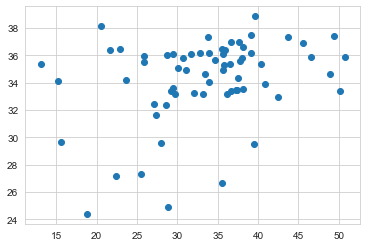

In [94]:
plt.scatter(y_test, predictions)

(array([ 2.,  2.,  2.,  5., 14., 16., 14.,  4.,  4.,  3.]),
 array([-22.28646024, -18.38195735, -14.47745447, -10.57295159,
         -6.6684487 ,  -2.76394582,   1.14055706,   5.04505995,
          8.94956283,  12.85406571,  16.7585686 ]),
 <BarContainer object of 10 artists>)

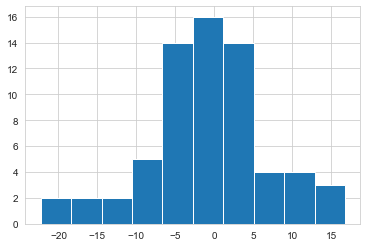

In [95]:
plt.hist(y_test - predictions.reshape(66,1))

In [96]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5.782744787328129
MSE: 60.681449527736184
RMSE: 7.7898298779714175


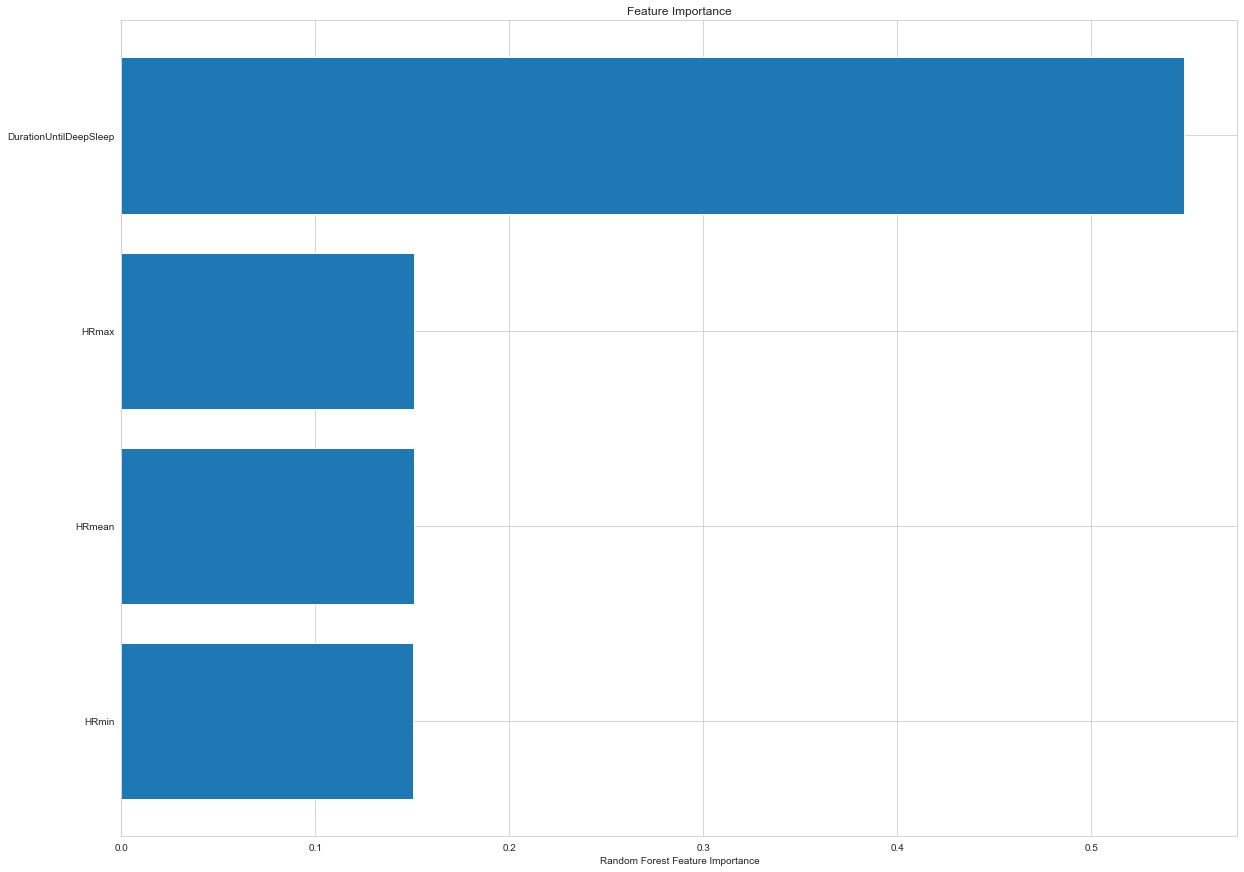

In [97]:
plt.figure(figsize=(20,15))
importance = grid.best_estimator_.feature_importances_
idxs = np.argsort(importance)
plt.title("Feature Importance")
plt.barh(range(len(idxs)),importance[idxs],align="center")
plt.yticks(range(len(idxs)),[X.columns.to_list()[i] for i in idxs])
plt.xlabel("Random Forest Feature Importance")
#plt.tight_layout()
plt.show()

### Redes Neuronais Artificiais

#### Treino e Previsão

In [108]:
import tensorflow as tf
import tensorflow.keras.layers as L

In [169]:
def build_model(num_classes, activation='relu', loss='mean_squared_error'):
    model = tf.keras.Sequential()
   
    model.add(L.Dense(32, input_dim=4, activation='relu'))
    model.add(L.Dense(64, activation='relu'))
    model.add(L.Dense(32, activation='relu'))
    model.add(L.Dense(8, activation='relu'))
   
    model.add(L.Dropout(0.2))
    model.add(L.Dense(num_classes, activation='relu'))
   
    
    model.compile(
        optimizer='adam',
        loss=loss,
        metrics=['mae']
    )
    
    return model

In [170]:
model = build_model(1, activation='relu', loss='mean_squared_error')
model.summary()
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test,y_test),
    batch_size=64,
    epochs=300,
    verbose=1
)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (None, 32)                160       
                                                                 
 dense_62 (Dense)            (None, 64)                2112      
                                                                 
 dense_63 (Dense)            (None, 32)                2080      
                                                                 
 dense_64 (Dense)            (None, 8)                 264       
                                                                 
 dropout_20 (Dropout)        (None, 8)                 0         
                                                                 
 dense_65 (Dense)            (None, 1)                 9         
                                                                 
Total params: 4,625
Trainable params: 4,625
Non-train

4/4 [==============================] - 0s 8ms/step - loss: 223.6947 - mae: 12.0437 - val_loss: 127.6307 - val_mae: 9.6154
Epoch 53/300
4/4 [==============================] - 0s 10ms/step - loss: 219.0318 - mae: 11.7851 - val_loss: 138.8356 - val_mae: 10.1375
Epoch 54/300
4/4 [==============================] - 0s 9ms/step - loss: 208.4838 - mae: 11.3779 - val_loss: 116.8981 - val_mae: 9.0949
Epoch 55/300
4/4 [==============================] - 0s 16ms/step - loss: 204.5672 - mae: 11.2996 - val_loss: 88.9457 - val_mae: 7.5008
Epoch 56/300
4/4 [==============================] - 0s 9ms/step - loss: 222.8562 - mae: 11.5885 - val_loss: 82.9921 - val_mae: 7.0946
Epoch 57/300
4/4 [==============================] - 0s 10ms/step - loss: 264.9524 - mae: 13.2175 - val_loss: 83.3914 - val_mae: 7.1293
Epoch 58/300
4/4 [==============================] - 0s 9ms/step - loss: 198.8182 - mae: 11.2774 - val_loss: 90.4809 - val_mae: 7.5666
Epoch 59/300
4/4 [==============================] - 0s 8ms/step - lo

Epoch 113/300
4/4 [==============================] - 0s 8ms/step - loss: 220.5757 - mae: 11.7069 - val_loss: 88.5735 - val_mae: 7.5684
Epoch 114/300
4/4 [==============================] - 0s 9ms/step - loss: 183.1563 - mae: 10.8986 - val_loss: 90.5593 - val_mae: 7.6801
Epoch 115/300
4/4 [==============================] - 0s 9ms/step - loss: 209.6715 - mae: 11.4343 - val_loss: 93.7359 - val_mae: 7.8621
Epoch 116/300
4/4 [==============================] - 0s 8ms/step - loss: 225.3684 - mae: 11.4448 - val_loss: 100.7973 - val_mae: 8.2611
Epoch 117/300
4/4 [==============================] - 0s 8ms/step - loss: 181.5785 - mae: 10.7488 - val_loss: 105.7136 - val_mae: 8.5455
Epoch 118/300
4/4 [==============================] - 0s 8ms/step - loss: 205.5366 - mae: 11.1438 - val_loss: 120.4523 - val_mae: 9.3293
Epoch 119/300
4/4 [==============================] - 0s 8ms/step - loss: 203.1256 - mae: 11.5245 - val_loss: 121.5946 - val_mae: 9.3885
Epoch 120/300
4/4 [==============================] 

4/4 [==============================] - 0s 7ms/step - loss: 181.9495 - mae: 10.9429 - val_loss: 104.8331 - val_mae: 8.4561
Epoch 174/300
4/4 [==============================] - 0s 7ms/step - loss: 181.8282 - mae: 10.8357 - val_loss: 116.9907 - val_mae: 9.1120
Epoch 175/300
4/4 [==============================] - 0s 7ms/step - loss: 208.5038 - mae: 11.5898 - val_loss: 111.2766 - val_mae: 8.7825
Epoch 176/300
4/4 [==============================] - 0s 7ms/step - loss: 226.4068 - mae: 11.7901 - val_loss: 107.7084 - val_mae: 8.5732
Epoch 177/300
4/4 [==============================] - 0s 7ms/step - loss: 170.0188 - mae: 10.3518 - val_loss: 95.1012 - val_mae: 7.8420
Epoch 178/300
4/4 [==============================] - 0s 7ms/step - loss: 188.8865 - mae: 11.1681 - val_loss: 83.6013 - val_mae: 7.1018
Epoch 179/300
4/4 [==============================] - 0s 7ms/step - loss: 210.5347 - mae: 11.7526 - val_loss: 82.7443 - val_mae: 7.0571
Epoch 180/300
4/4 [==============================] - 0s 8ms/step 

4/4 [==============================] - 0s 7ms/step - loss: 218.0516 - mae: 11.3966 - val_loss: 101.0077 - val_mae: 8.2463
Epoch 234/300
4/4 [==============================] - 0s 8ms/step - loss: 221.5895 - mae: 11.9899 - val_loss: 94.8149 - val_mae: 7.8829
Epoch 235/300
4/4 [==============================] - 0s 7ms/step - loss: 188.5144 - mae: 11.1027 - val_loss: 91.2592 - val_mae: 7.6966
Epoch 236/300
4/4 [==============================] - 0s 7ms/step - loss: 191.0512 - mae: 11.1535 - val_loss: 87.2390 - val_mae: 7.4626
Epoch 237/300
4/4 [==============================] - 0s 7ms/step - loss: 192.4429 - mae: 10.9709 - val_loss: 87.2921 - val_mae: 7.4776
Epoch 238/300
4/4 [==============================] - 0s 7ms/step - loss: 198.8810 - mae: 11.2860 - val_loss: 92.1686 - val_mae: 7.7771
Epoch 239/300
4/4 [==============================] - 0s 7ms/step - loss: 194.8260 - mae: 11.1469 - val_loss: 92.2046 - val_mae: 7.7640
Epoch 240/300
4/4 [==============================] - 0s 7ms/step - l

4/4 [==============================] - 0s 8ms/step - loss: 182.8155 - mae: 10.7936 - val_loss: 89.8957 - val_mae: 7.6849
Epoch 294/300
4/4 [==============================] - 0s 8ms/step - loss: 229.5996 - mae: 12.0832 - val_loss: 95.9608 - val_mae: 8.0212
Epoch 295/300
4/4 [==============================] - 0s 7ms/step - loss: 152.1612 - mae: 9.6185 - val_loss: 101.8897 - val_mae: 8.3227
Epoch 296/300
4/4 [==============================] - 0s 7ms/step - loss: 175.8432 - mae: 10.6741 - val_loss: 115.6390 - val_mae: 9.0472
Epoch 297/300
4/4 [==============================] - 0s 7ms/step - loss: 175.3740 - mae: 10.4968 - val_loss: 112.1944 - val_mae: 8.8715
Epoch 298/300
4/4 [==============================] - 0s 7ms/step - loss: 197.7892 - mae: 11.0974 - val_loss: 94.4623 - val_mae: 7.8500
Epoch 299/300
4/4 [==============================] - 0s 7ms/step - loss: 203.5214 - mae: 11.3436 - val_loss: 85.9731 - val_mae: 7.2910
Epoch 300/300
4/4 [==============================] - 0s 7ms/step - 

In [171]:
predictions = model.predict(X_test)
predictions

array([[27.85621 ],
       [28.229849],
       [32.00483 ],
       [28.374117],
       [31.124023],
       [30.77579 ],
       [24.914804],
       [25.301687],
       [32.137833],
       [36.124287],
       [35.582657],
       [28.14108 ],
       [30.909826],
       [28.385244],
       [32.421963],
       [30.910522],
       [27.427416],
       [21.560423],
       [20.884619],
       [33.50677 ],
       [27.384787],
       [31.162527],
       [33.9796  ],
       [24.955746],
       [34.24662 ],
       [37.350533],
       [27.099794],
       [31.140482],
       [31.025978],
       [29.079376],
       [28.780144],
       [33.690144],
       [33.836483],
       [26.089472],
       [30.406391],
       [27.687368],
       [26.0801  ],
       [28.054781],
       [31.359655],
       [31.51821 ],
       [33.72836 ],
       [27.015718],
       [32.997833],
       [34.375496],
       [26.189352],
       [31.190325],
       [21.787142],
       [15.992893],
       [35.316296],
       [20.92289 ],


#### Avaliação

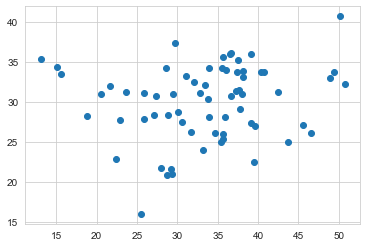

In [172]:
plt.scatter(y_test, predictions)

(array([ 2.,  1.,  2.,  5.,  6., 15., 14., 13.,  3.,  5.]),
 array([-22.25659413, -17.98401145, -13.71142878,  -9.4388461 ,
         -5.16626342,  -0.89368075,   3.37890193,   7.65148461,
         11.92406728,  16.19664996,  20.46923264]),
 <BarContainer object of 10 artists>)

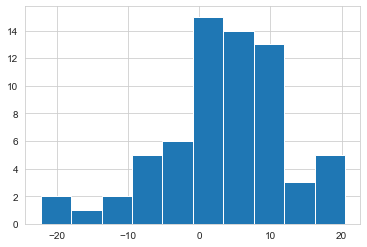

In [173]:
plt.hist(y_test - predictions.reshape(66,1))

In [174]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.437167325252475
MSE: 88.20286525416888
RMSE: 9.391638049572018


### XGBoost

#### Treino e Previsão

In [175]:
import xgboost as xgb

In [176]:
params = {'max_depth': range (2, 10, 1), 'n_estimators': [50, 100, 250, 400, 500, 600, 750, 1000],
              'learning_rate': [0.001, 0.0025, 0.005, 0.0075, 0.01]
}
clf = xgb.XGBRegressor(use_label_encoder =False)

In [177]:
grid = GridSearchCV(clf, params, cv=KFold(n_splits=10), n_jobs=1, verbose=1, return_train_score=True, scoring='neg_mean_absolute_error', refit=True)

In [178]:
grid.fit(X_train,y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constra...
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             n_jobs=1,
      

In [179]:
print(f'The best parameters are: {grid.best_params_}')
print(f'The best score that we got is: {grid.best_score_}')

The best parameters are: {'learning_rate': 0.005, 'max_depth': 2, 'n_estimators': 750}
The best score that we got is: -6.096579639825714


In [180]:
predictions = grid.predict(X_test)
predictions

array([35.03243 , 23.186783, 36.374134, 23.458912, 34.497658, 31.375137,
       24.914019, 34.176025, 34.497658, 34.363052, 34.664898, 35.717216,
       35.776028, 31.492094, 33.962017, 34.497658, 35.490105, 33.515247,
       34.63949 , 29.447971, 36.261887, 31.492094, 33.677338, 36.670902,
       29.222378, 34.21298 , 36.374134, 34.497658, 36.318626, 35.533783,
       33.558537, 34.447517, 37.063156, 34.97692 , 35.776028, 36.13189 ,
       35.048367, 35.73235 , 33.962017, 35.135113, 35.08497 , 37.244568,
       34.497658, 34.497658, 27.429482, 34.497658, 29.022692, 28.042421,
       34.21298 , 34.694996, 35.725883, 34.21298 , 28.574692, 34.21298 ,
       24.696035, 34.447517, 34.497658, 34.41393 , 33.017643, 34.21298 ,
       33.067783, 32.6865  , 34.97692 , 34.497658, 33.44847 , 35.725883],
      dtype=float32)

#### Avaliação

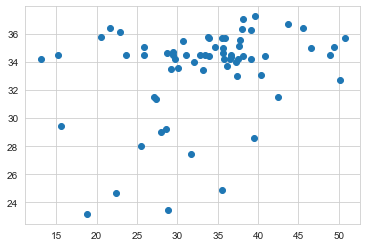

In [181]:
plt.scatter(y_test, predictions)

(array([ 2.,  3.,  2.,  3., 14., 15., 15.,  4.,  4.,  4.]),
 array([-21.15327687, -17.2944927 , -13.43570853,  -9.57692436,
         -5.71814019,  -1.85935602,   1.99942815,   5.85821232,
          9.71699649,  13.57578066,  17.43456483]),
 <BarContainer object of 10 artists>)

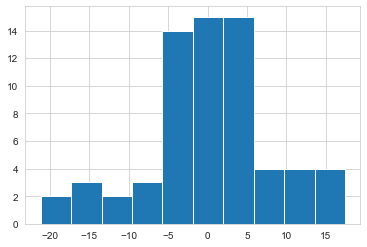

In [182]:
plt.hist(y_test - predictions.reshape(66,1))

In [184]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5.783050293551346
MSE: 60.741402591648665
RMSE: 7.793677090542606
